### Problem Statment 

The data is provided for the purpose of bias correction of next-day air temperature forecasts generated by the LDAPS model, operated by the Korea Meteorological Administration (KMA) over Seoul, South Korea. The dataset spans the summer months from 2013 to 2017 and includes both the model's forecast data and actual temperature observations.

**Dataset Description:**
- **Time Period:** Summer data from 2013 to 2017
- **Geographic Location:** Seoul, South Korea
- **Variables:**
  - **LDAPS Model Forecast Data:** Next-day forecast values from the LDAPS model
  - **In-Situ Temperature Observations:** Present-day maximum and minimum air temperatures
  - **Geographic Auxiliary Variables:** Variables such as latitude, longitude, elevation, and slope
- **Target Variables:** Next-day maximum air temperature (Tmax) and next-day minimum air temperature (Tmin)
- **Validation Period:** Hindcast validation conducted from 2015 to 2017

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [107]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv')

In [108]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [109]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [110]:
df.shape

(7752, 25)

In [111]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

**The dataset contains 7752 rows and 25 columns.**

### Data Explotory Analysis(EDA)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


From above we can observed that
- There are two type of data type present 'float' and 'object'
- There are missing value present in dataset.

### Checking Nan,Null,Other and handling

In [113]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We will drpoing all null values 

In [114]:
df=df.dropna()

In [115]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [116]:
df.drop('Date',axis=1,inplace=True)

### Data Visulazation

<Axes: xlabel='Next_Tmax', ylabel='Next_Tmin'>

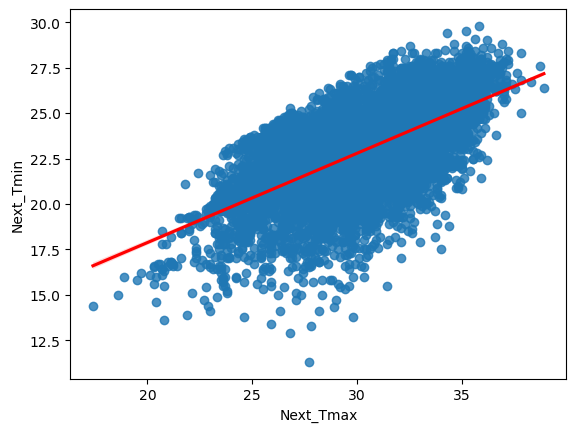

In [117]:
sns.regplot(x='Next_Tmax',y='Next_Tmin',data=df,line_kws={"color": "red"})

From above graph we can observed tbat
1. **Positive Correlation:**
   - There is a clear positive correlation between `Next_Tmax` and `Next_Tmin`.
   - As `Next_Tmax` increases, `Next_Tmin` also increases.

2. **Linear Relationship:**
   - The linear regression line (red) fits the data well, indicating a strong linear relationship.
   - The slope of the line is positive, further confirming the positive correlation.

3. **Data Distribution:**
   - The data points are densely clustered along the regression line, suggesting a consistent relationship between the variables.
   - There is some scatter around the line, but the general trend is maintained.

4. **Range:**
   - `Next_Tmax` values range from approximately 15 to 40.
   - `Next_Tmin` values range from approximately 12.5 to 30.

This plot indicates that higher maximum temperatures for the next day (`Next_Tmax`) are associated with higher minimum temperatures for the next day (`Next_Tmin`), which is expected in many meteorological contexts where daytime and nighttime temperatures tend to rise and fall together.

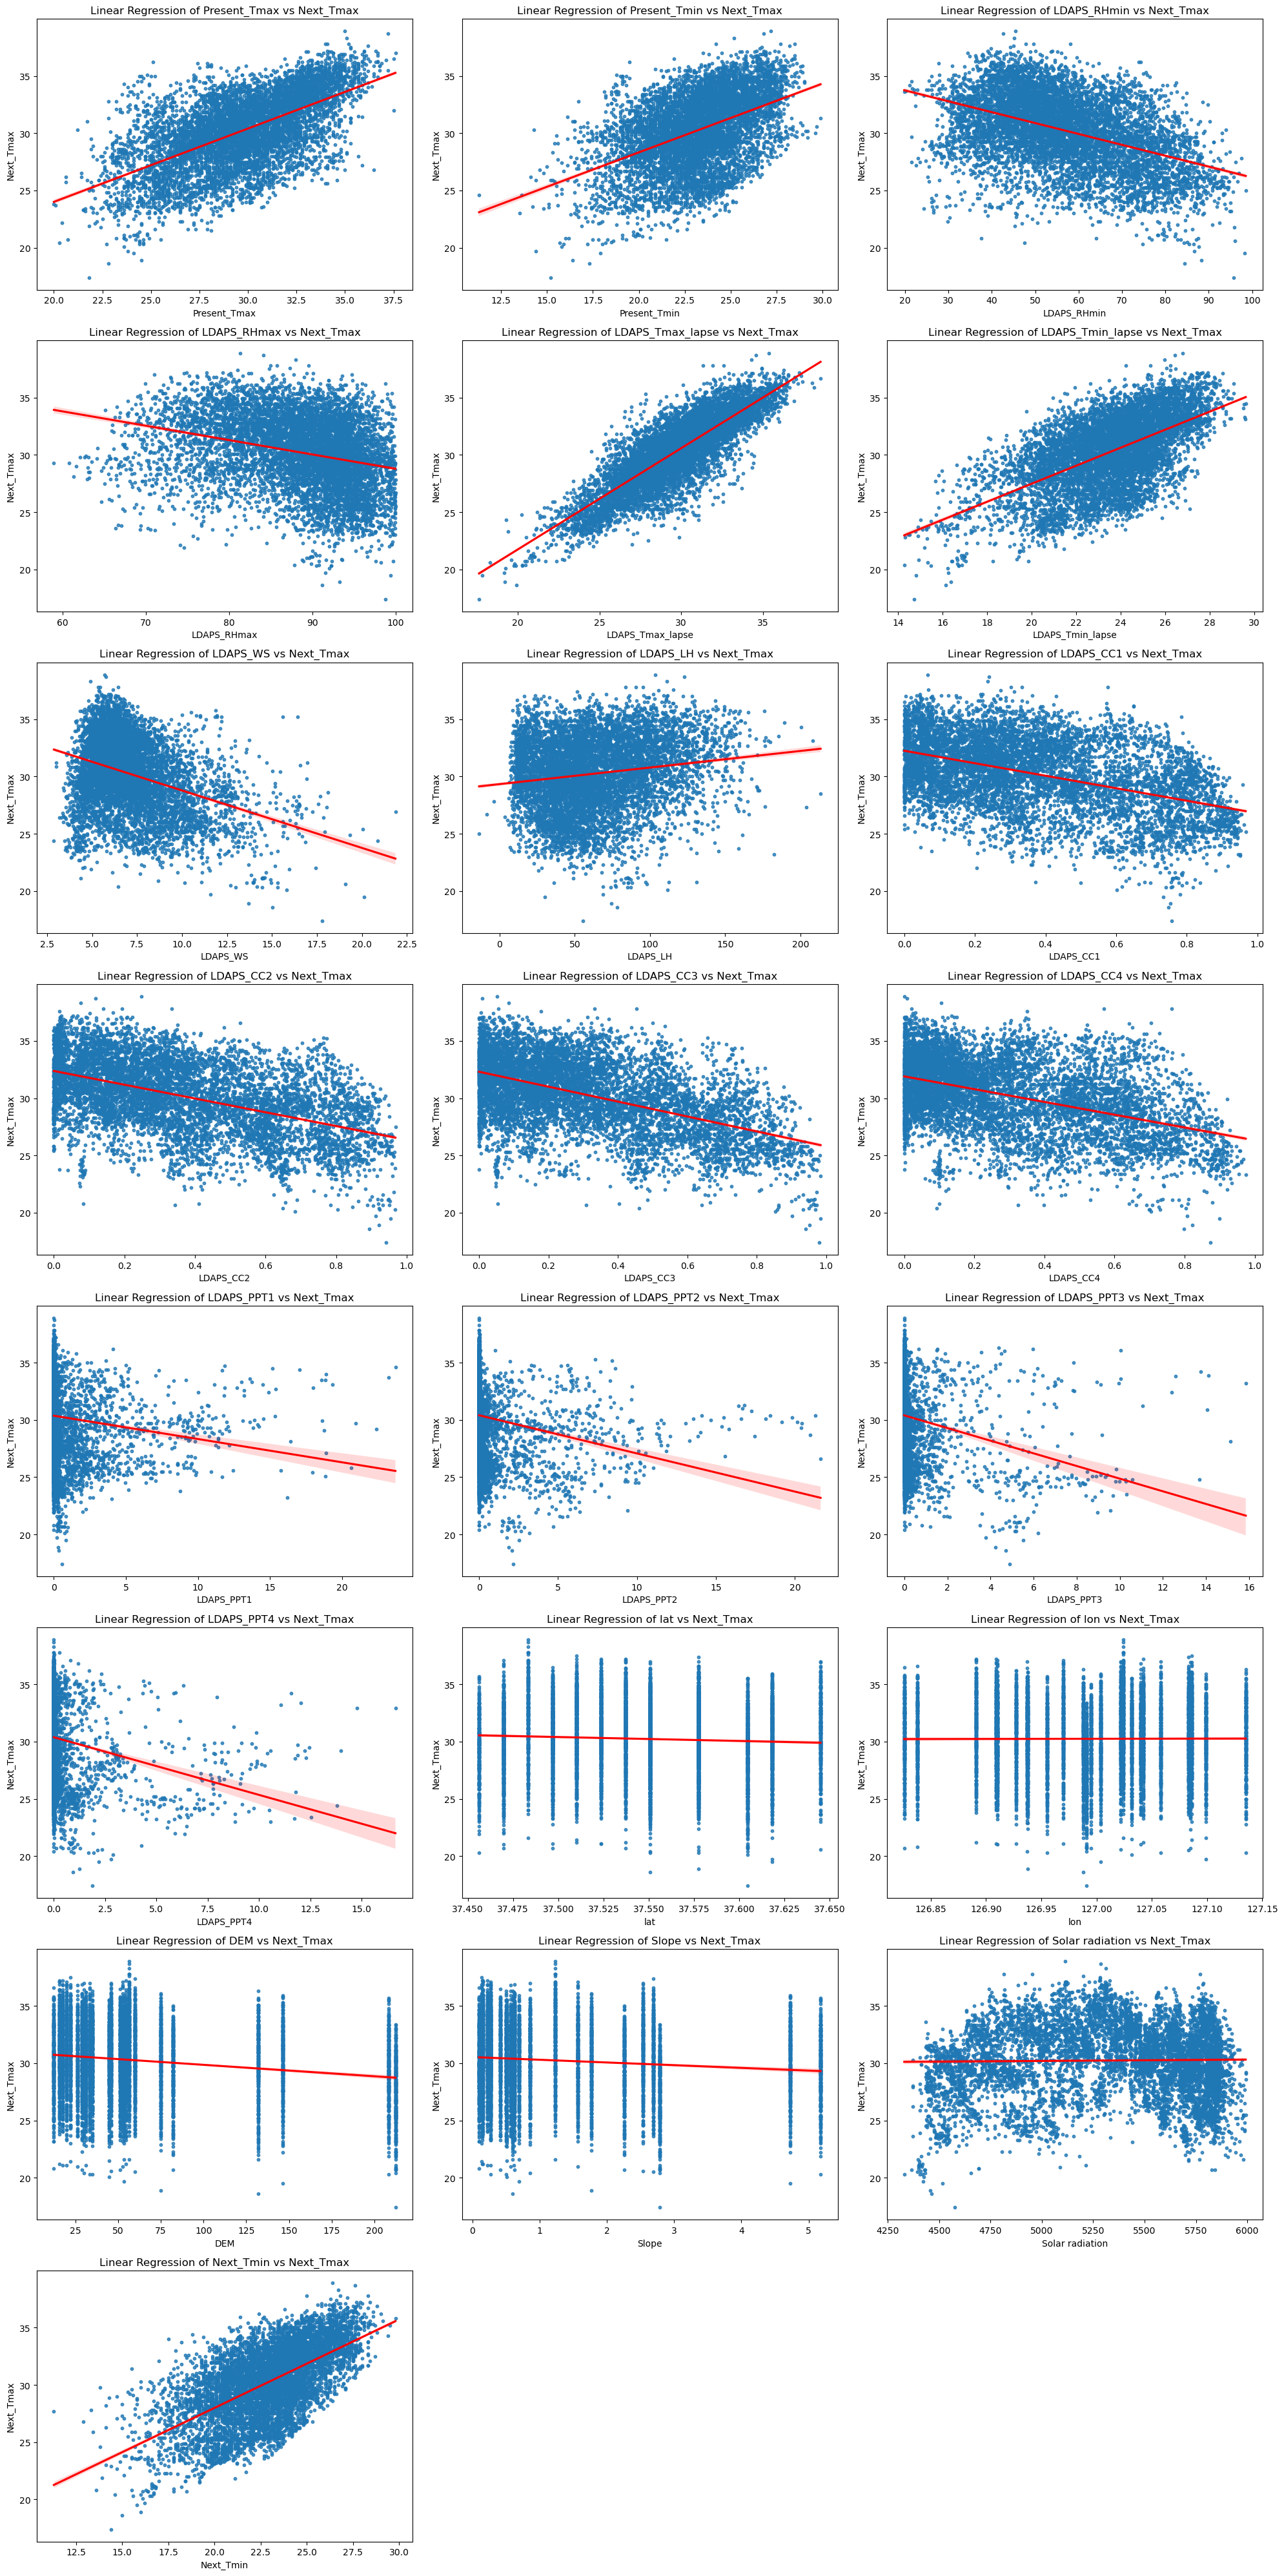

In [118]:
# Define the list of columns to plot against 'AveragePrice'
columns_to_plot = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmin']

# Number of columns for the subplots
num_cols = 3

# Calculate the number of rows needed
num_rows = len(columns_to_plot) // num_cols + int(len(columns_to_plot) % num_cols != 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten axes for easy iteration, in case num_rows or num_cols is 1
axes = axes.flatten()

# Plot lmplot for each column
for count, column in enumerate(columns_to_plot):
    sns.regplot(x=column, y='Next_Tmax', data=df,ax=axes[count], scatter_kws={'s': 10}, line_kws={"color": "red"})
    axes[count].set_title(f'Linear Regression of {column} vs Next_Tmax')
    axes[count].set_xlabel(column)
    axes[count].set_ylabel('Next_Tmax')

# Hide any remaining empty subplots
for i in range(count + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### From above graph we can observed that:
1. **LAIAPS_PPT4 vs. Next_Tmax:**
   - There is a negative correlation between LAIAPS_PPT4 and Next_Tmax.
   - As LAIAPS_PPT4 increases, Next_Tmax decreases.

2. **lat vs. Next_Tmax:**
   - There is no noticeable trend between latitude and Next_Tmax.
   - The data points are scattered, showing no clear correlation.

3. **lon vs. Next_Tmax:**
   - Similar to latitude, longitude also shows no clear trend with Next_Tmax.
   - The data points are widely scattered.

4. **DEM vs. Next_Tmax:**
   - There is a slight negative correlation between DEM and Next_Tmax.
   - Higher DEM values are associated with lower Next_Tmax values.

5. **Slope vs. Next_Tmax:**
   - No clear trend is observed between slope and Next_Tmax.
   - The data points do not show any significant correlation.

6. **Solar radiation vs. Next_Tmax:**
   - There is a slight negative trend, but the correlation is weak.
   - The spread of data points is quite wide.

7. **Next_Tmin vs. Next_Tmax:**
   - A strong positive correlation is observed.
   - As Next_Tmin increases, Next_Tmax also increases significantly.

1. **Present_Tmax vs. Next_Tmax:**
   - There is a strong positive correlation.
   - Higher Present_Tmax values are associated with higher Next_Tmax values.

2. **Present_Tmin vs. Next_Tmax:**
   - A strong positive correlation is seen.
   - Higher Present_Tmin values correspond to higher Next_Tmax values.

3. **Present_RHmin vs. Next_Tmax:**
   - There is a slight negative correlation.
   - As Present_RHmin increases, Next_Tmax tends to decrease.

4. **LAIAPS_Hrmax vs. Next_Tmax:**
   - A negative correlation is present.
   - Higher LAIAPS_Hrmax values correspond to lower Next_Tmax values.

5. **LAIAPS_Tmax_base vs. Next_Tmax:**
   - Strong positive correlation is observed.
   - Higher LAIAPS_Tmax_base values are associated with higher Next_Tmax values.

6. **LAIAPS_Tmin_base vs. Next_Tmax:**
   - Positive correlation is present.
   - As LAIAPS_Tmin_base increases, Next_Tmax increases.

7. **LAIAPS_WS vs. Next_Tmax:**
   - Negative correlation is observed.
   - Higher LAIAPS_WS values correspond to lower Next_Tmax values.

8. **LAIAPS_LH vs. Next_Tmax:**
   - Positive correlation is present.
   - Higher LAIAPS_LH values are associated with higher Next_Tmax values.

9. **LAIAPS_CC1 vs. Next_Tmax:**
   - No significant correlation is observed.
   - Data points are widely scattered.

10. **LAIAPS_CC2 vs. Next_Tmax:**
    - Slight negative trend, but correlation is weak.
    - Wide scatter of data points.

11. **LAIAPS_CC3 vs. Next_Tmax:**
    - Slight negative correlation.
    - Higher LAIAPS_CC3 values slightly correspond to lower Next_Tmax values.

12. **LAIAPS_CC4 vs. Next_Tmax:**
    - Negative correlation is observed.
    - Higher LAIAPS_CC4 values are associated with lower Next_Tmax values.

13. **LAIAPS_CC5 vs. Next_Tmax:**
    - No significant correlation.
    - Wide scatter of data points.

14. **LAIAPS_PPT1 vs. Next_Tmax:**
    - Negative correlation is observed.
    - Higher LAIAPS_PPT1 values correspond to lower Next_Tmax values.

15. **LAIAPS_PPT2 vs. Next_Tmax:**
    - Negative correlation is observed.
    - Higher LAIAPS_PPT2 values correspond to lower Next_Tmax values.

16. **LAIAPS_PPT3 vs. Next_Tmax:**
    - Negative correlation is observed.
    - Higher LAIAPS_PPT3 values correspond to lower Next_Tmax values.

Overall, several variables show strong correlations with Next_Tmax, such as Next_Tmin, Present_Tmax, and Present_Tmin, while other variables like latitude, longitude, and slope do not show significant correlations. The relationships are indicated by the slope and spread of the data points along the regression lines.

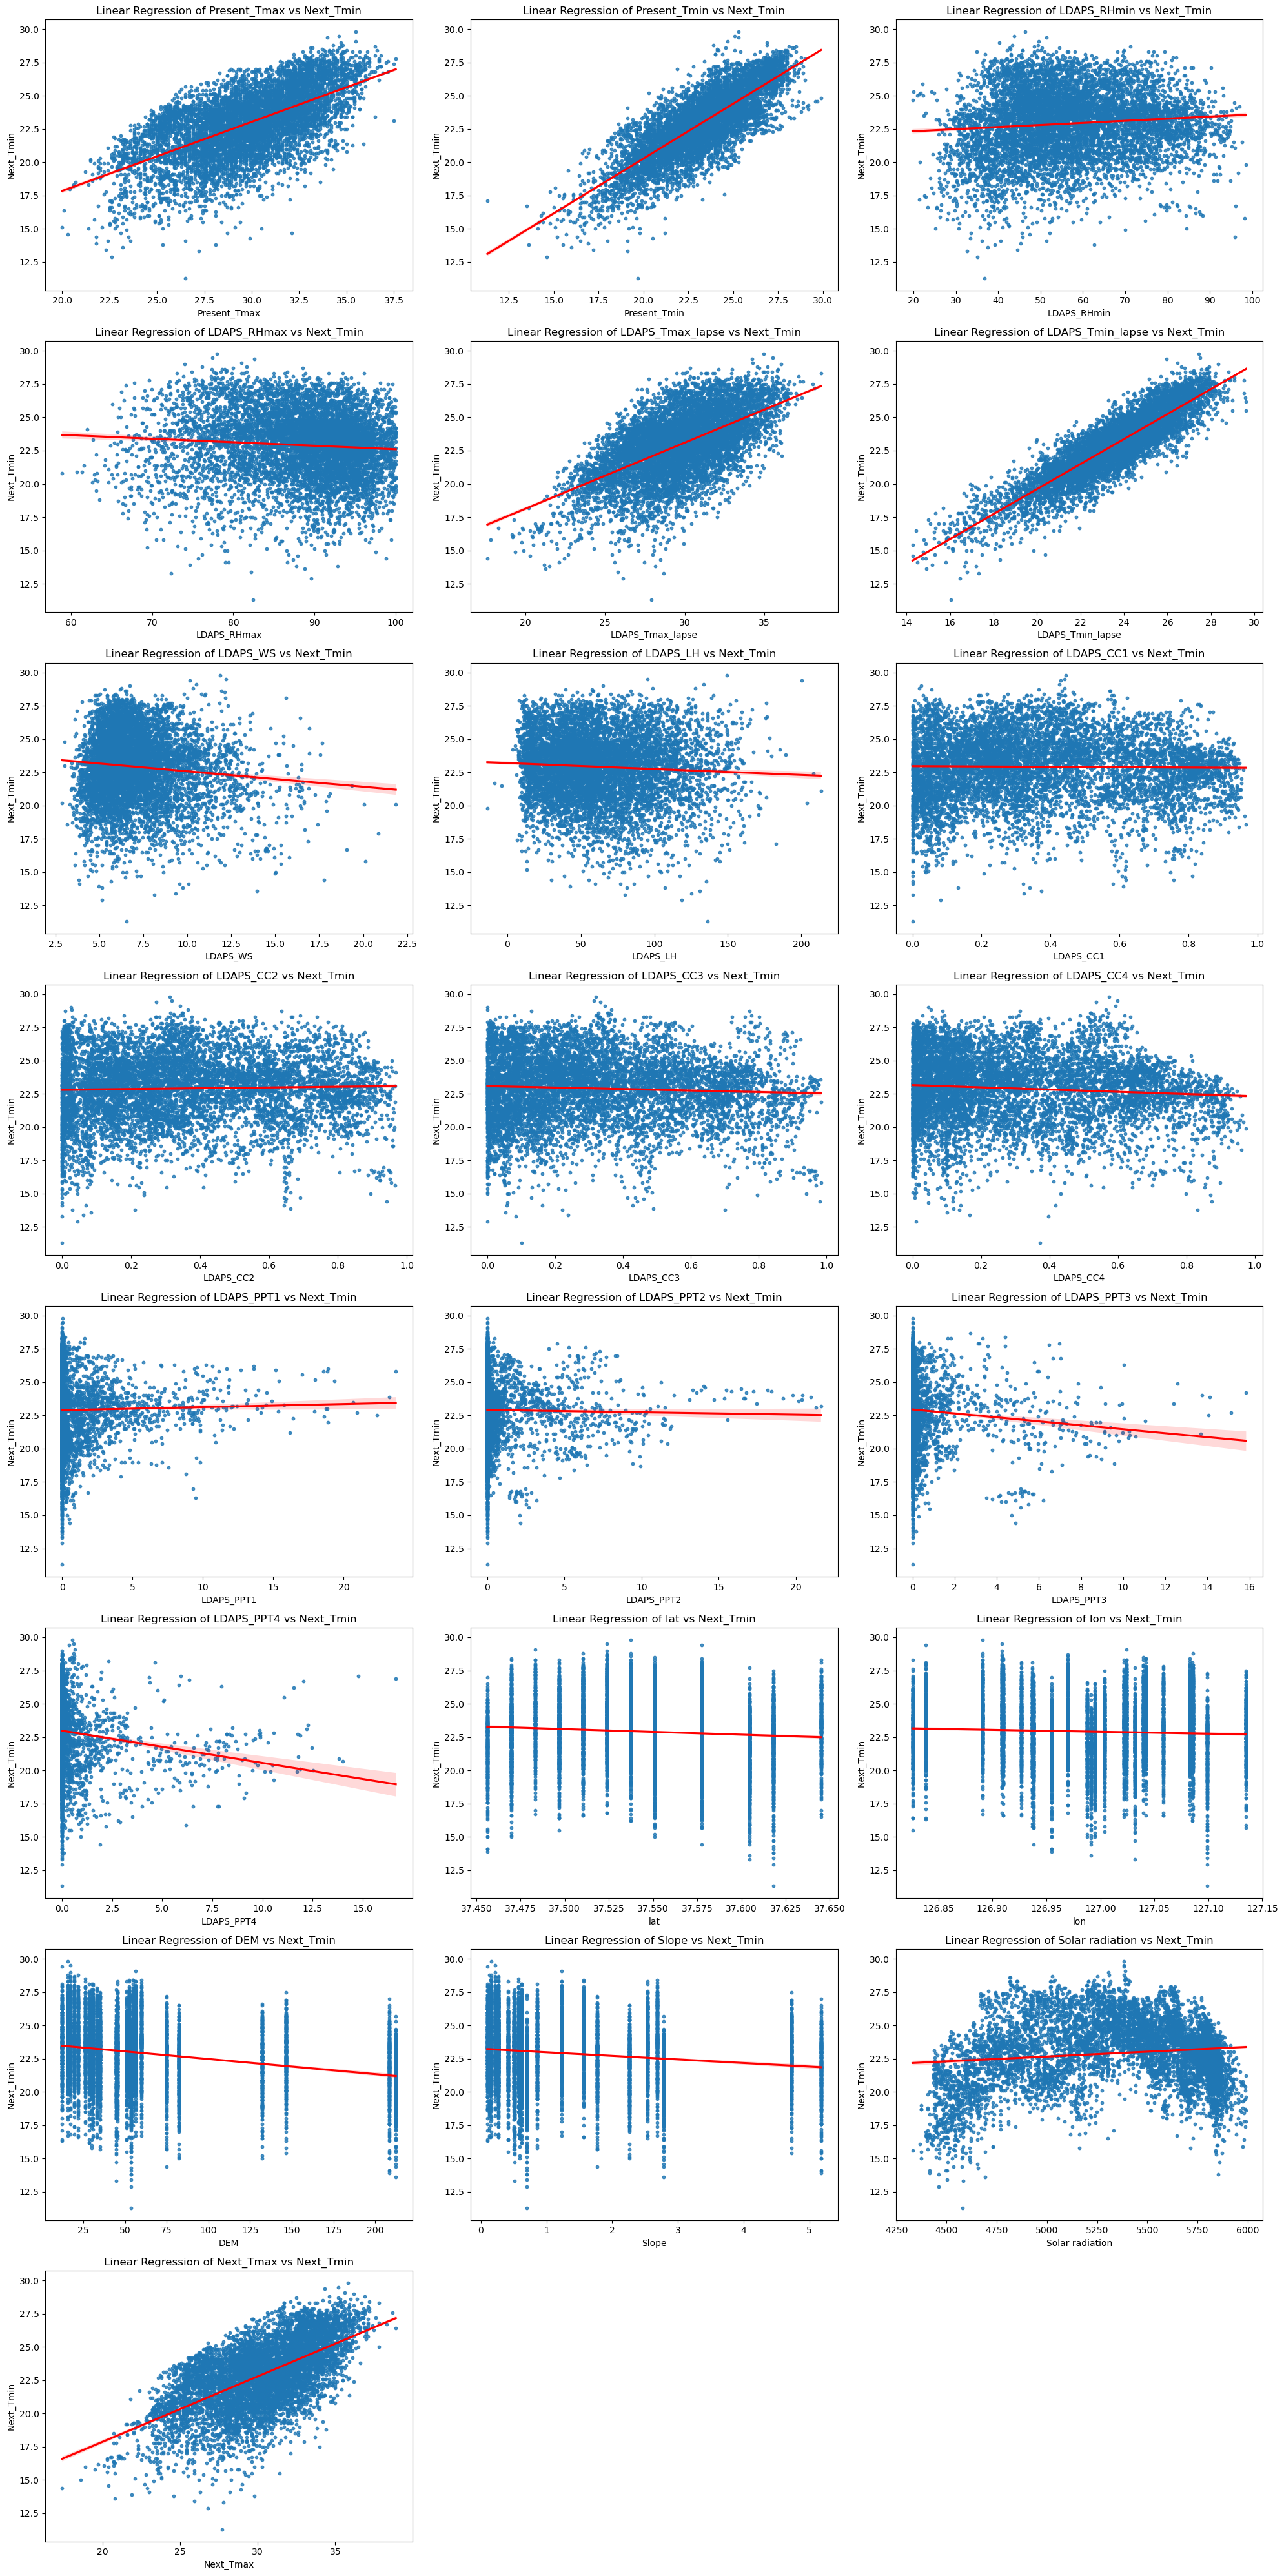

In [119]:
# Define the list of columns to plot against 'AveragePrice'
columns_to_plot = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax']

# Number of columns for the subplots
num_cols = 3

# Calculate the number of rows needed
num_rows = len(columns_to_plot) // num_cols + int(len(columns_to_plot) % num_cols != 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten axes for easy iteration, in case num_rows or num_cols is 1
axes = axes.flatten()

# Plot lmplot for each column
for count, column in enumerate(columns_to_plot):
    sns.regplot(x=column, y='Next_Tmin', data=df,ax=axes[count], scatter_kws={'s': 10}, line_kws={"color": "red"})
    axes[count].set_title(f'Linear Regression of {column} vs Next_Tmin')
    axes[count].set_xlabel(column)
    axes[count].set_ylabel('Next_Tmin')

# Hide any remaining empty subplots
for i in range(count + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

1. **Temperature Correlation**: Present temperature metrics (`Present_Tmax`, `Present_Tmin`, `Present_RHmin`) and future temperature metrics (`Next_Tmax`, `Next_Tmin`) exhibit a strong positive correlation, as shown by the dense scatter plots with positive slopes.

2. **Low Impact of Meteorological Variables**: Variables such as `Slope`, `DEM`, `Solar radiation`, and certain LDAPS metrics (`PPT`, `CC`, `WIND`, `LH`, `PS`, `CC1`, `CC2`, `CC3`, `CC4`) show weak or no correlation with `Next_Tmin`, indicating minimal influence on future minimum temperature predictions.

3. **Inverse and Weak Correlations**: Certain LDAPS variables like `PPT1`, `PPT2`, and `RHmax` show a weak inverse correlation with `Next_Tmin`, suggesting a slight negative impact on future minimum temperature predictions.

#### Checking Distribution of data

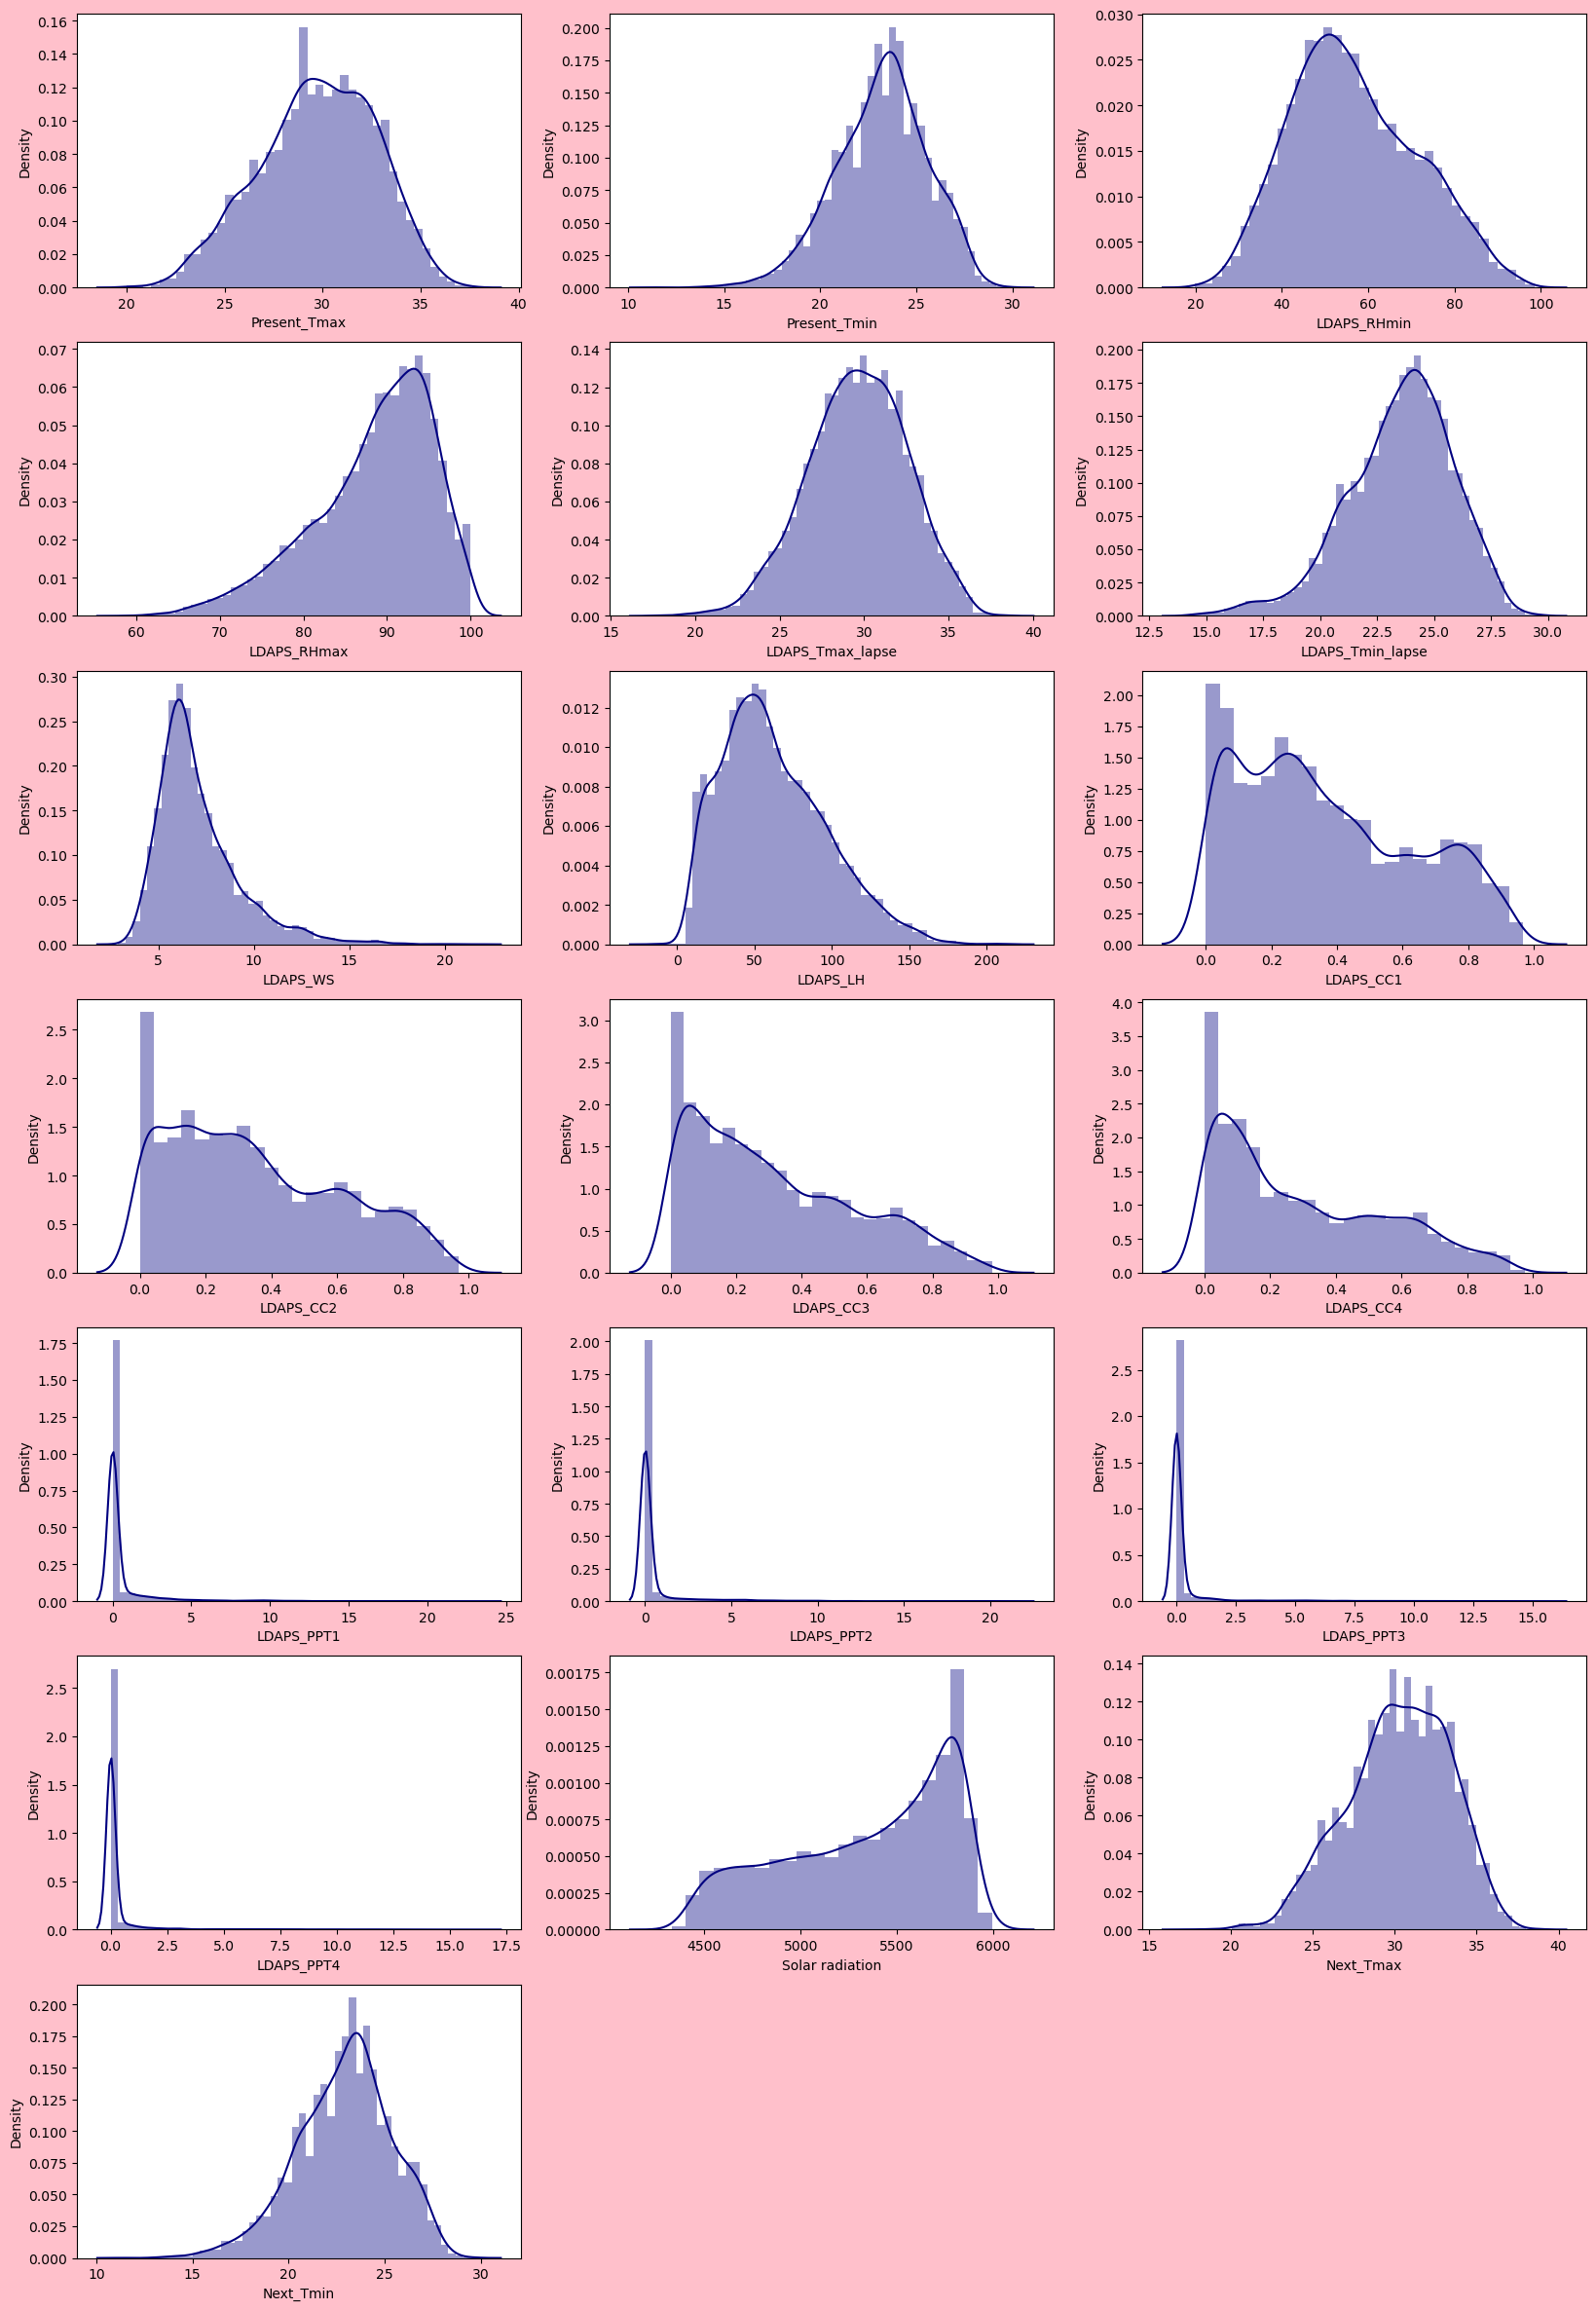

In [120]:
plt.figure(figsize=(20,100),facecolor='pink')
count=1
list=['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','Solar radiation', 'Next_Tmax', 'Next_Tmin']
for i in list:
    if count<=25:
        ax=plt.subplot(23,3,count)
        sns.distplot(df[i],color='navy')
        plt.xlabel(i)
    count+=1
plt.show()

#### Checking Outliers

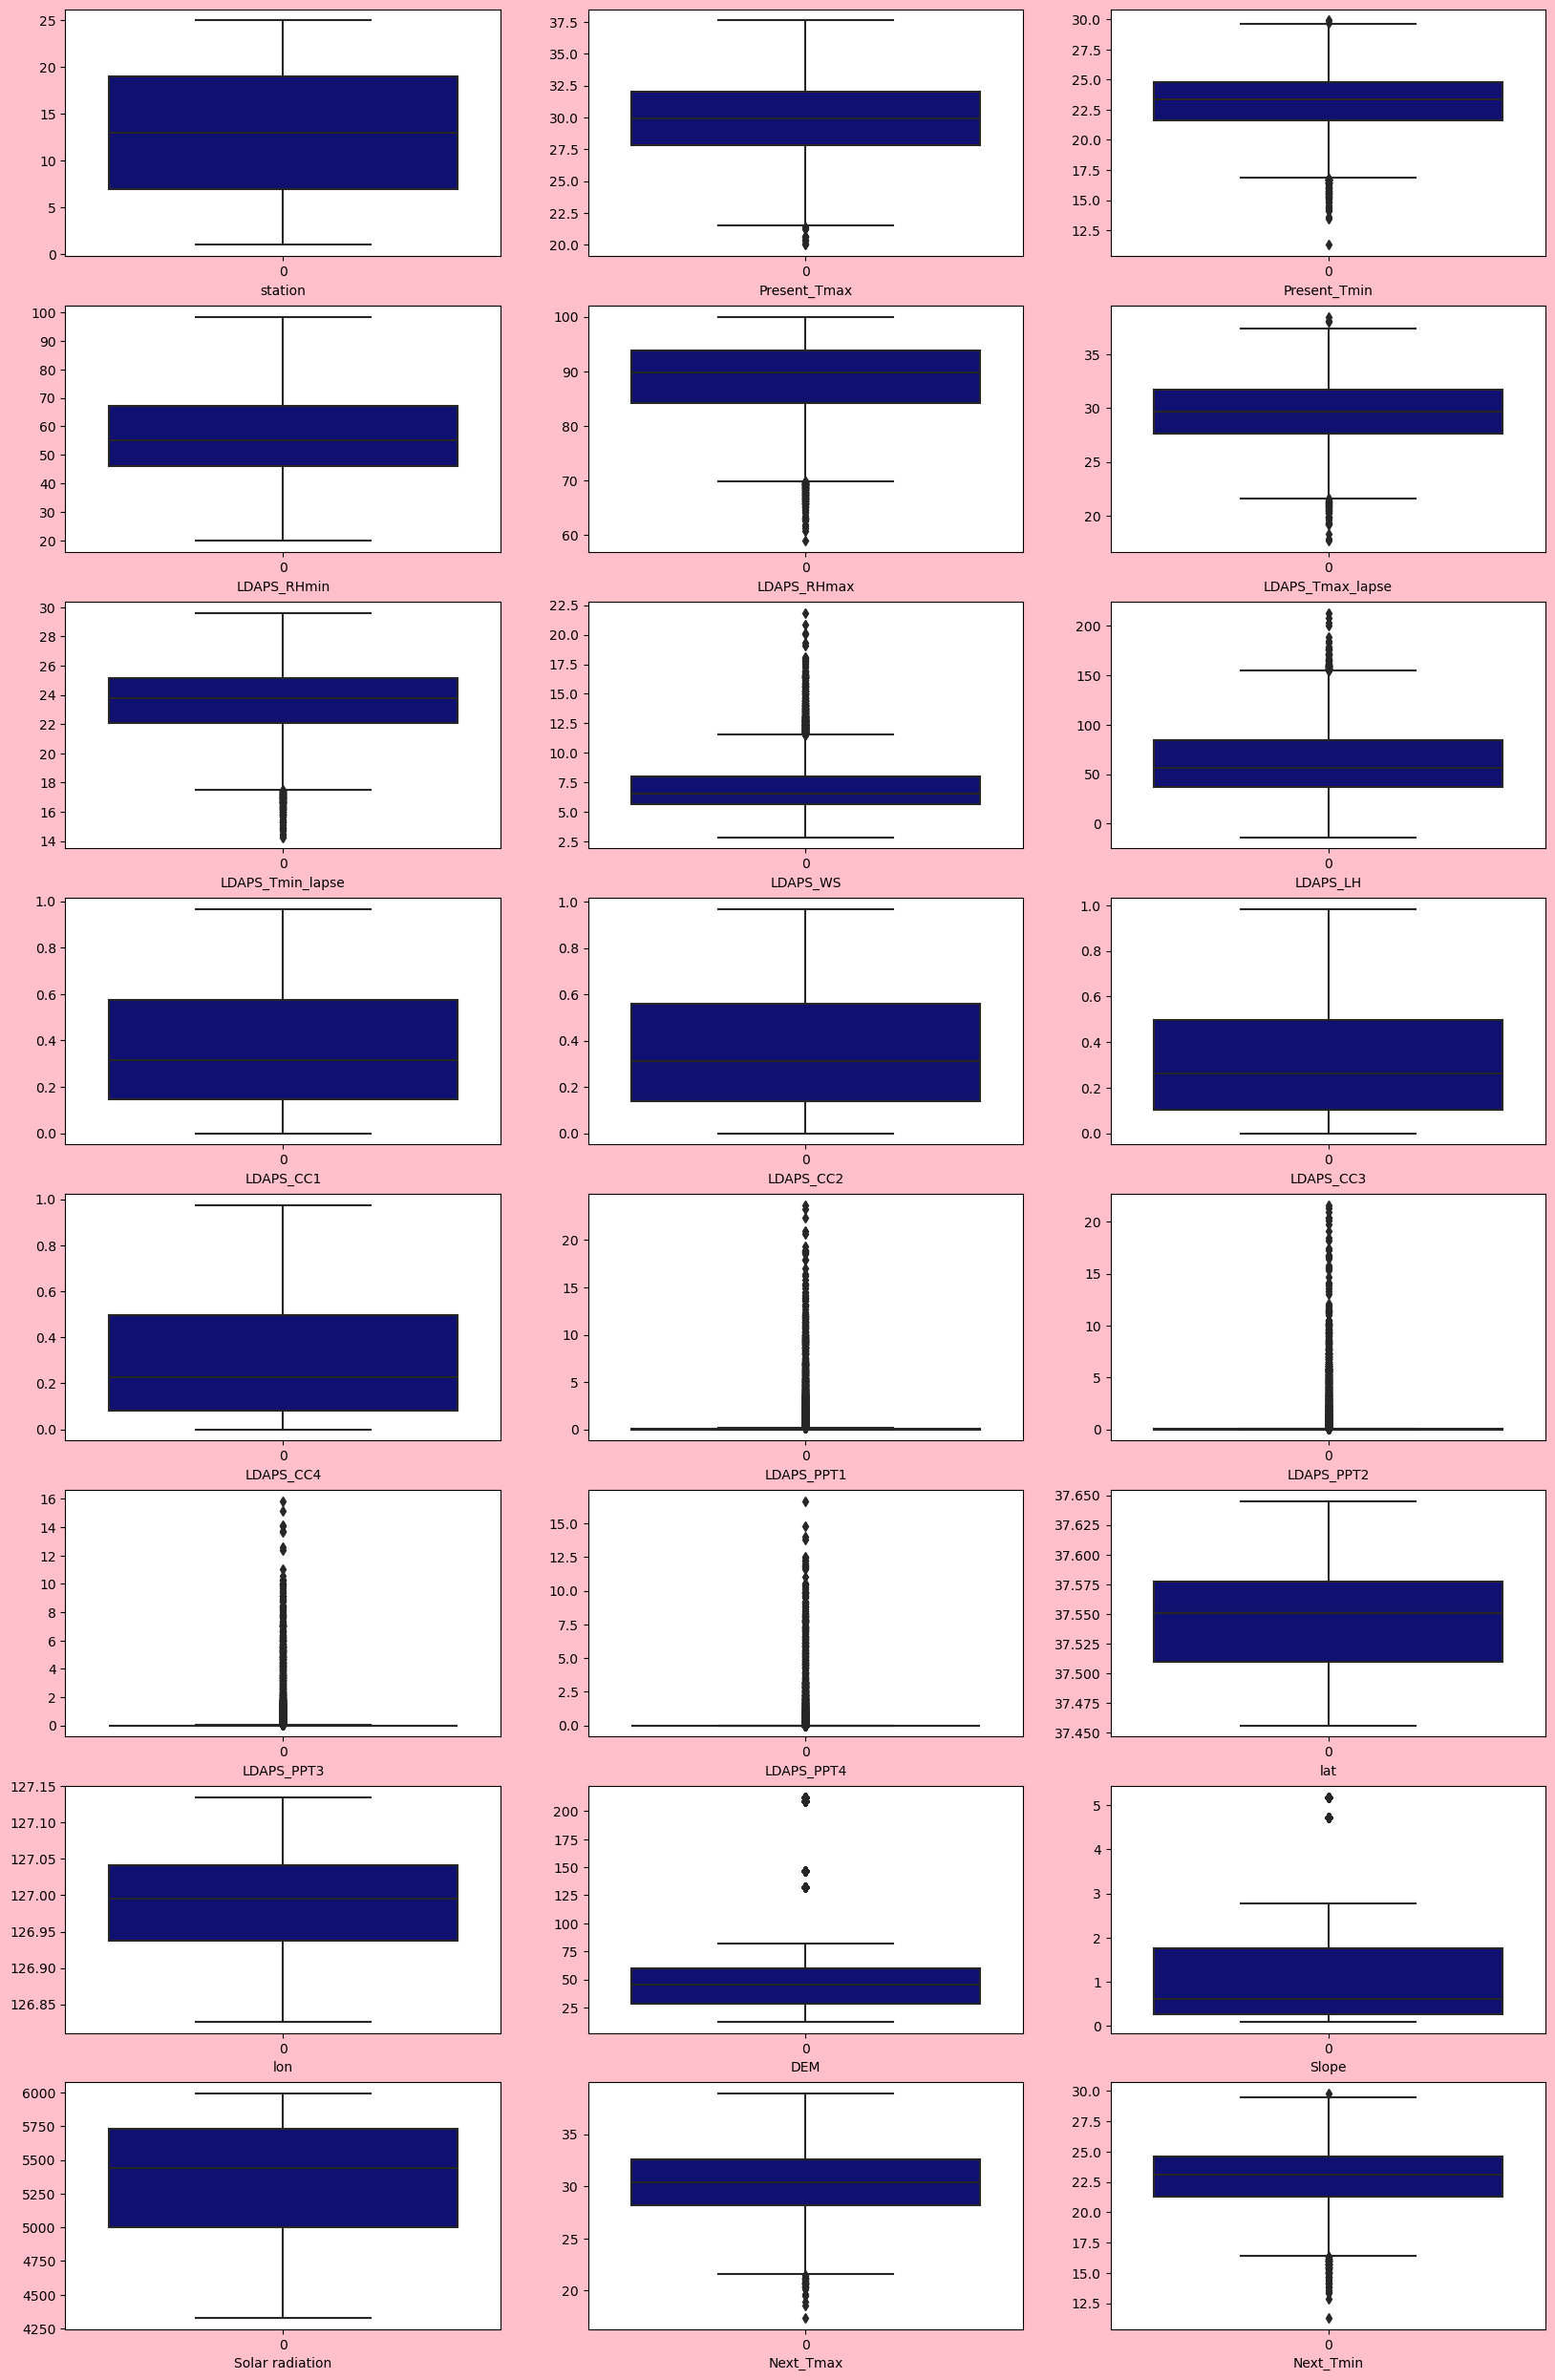

In [121]:
plt.figure(figsize=(20,100),facecolor='pink')
count=1
list=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']
for i in list:
    if count<=30:
        ax=plt.subplot(25,3,count)
        sns.boxplot(df[i],color='navy')
        plt.xlabel(i)
    count+=1
plt.show()

We can observed that the outliers is present in the data set but we go with the outliers 

In [122]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

We observed skewness in the columns 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', and 'LDAPS_PPT4'. We will removing this by applying the square root transformation method

In [123]:
#removing skewness by using cuberoot method
df['LDAPS_PPT1']=np.cbrt(df['LDAPS_PPT1'])

In [124]:
df['LDAPS_PPT2']=np.cbrt(df['LDAPS_PPT2'])

In [125]:
df['LDAPS_PPT3']=np.cbrt(df['LDAPS_PPT3'])

In [126]:
df['LDAPS_PPT4']=np.cbrt(df['LDAPS_PPT4'])

In [127]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          1.955868
LDAPS_PPT2          2.267487
LDAPS_PPT3          2.575795
LDAPS_PPT4          2.837790
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

#### First we will go with the target variable 'Next_Tmax'

#### Checking correlation between target variable and independent variables

In [128]:
corr_matrix=df.corr()
corr_matrix

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.113301      0.133282    -0.067846   
Present_Tmax      0.113301      1.000000      0.615208    -0.209059   
Present_Tmin      0.133282      0.615208      1.000000     0.122200   
LDAPS_RHmin      -0.067846     -0.209059      0.122200     1.000000   
LDAPS_RHmax      -0.169351     -0.306943     -0.018576     0.578358   
LDAPS_Tmax_lapse  0.069856      0.573777      0.467904    -0.569580   
LDAPS_Tmin_lapse  0.105277      0.628705      0.772061     0.085237   
LDAPS_WS          0.005822     -0.125952     -0.038779     0.289422   
LDAPS_LH         -0.132129      0.134246     -0.012817    -0.072195   
LDAPS_CC1         0.006539     -0.316333      0.084348     0.612831   
LDAPS_CC2         0.003526     -0.216976      0.090038     0.744774   
LDAPS_CC3        -0.000161     -0.146391     -0.004719     0.688069   
LDAPS_CC4         0.005005     -0.143069     -0.046694     0.513937   
LDAPS_PPT1       -0.004495     -0.186100      0.111354     0.425852   
LDAPS_PPT2       -0.010172     -0.151768      0.083054     0.576784   
LDAPS_PPT3       -0.018516     -0.137308     -0.029968     0.434807   
LDAPS_PPT4       -0.006713     -0.129598     -0.101194     0.298739   
lat              -0.239118     -0.054134     -0.081417     0.085027   
lon              -0.118845      0.007695     -0.045174    -0.077590   
DEM              -0.256706     -0.189439     -0.254084     0.100684   
Slope            -0.091721     -0.107079     -0.148423     0.122454   
Solar radiation  -0.021194     -0.022114      0.059765     0.242168   
Next_Tmax         0.107747      0.610357      0.463523    -0.446824   
Next_Tmin         0.128184      0.621048      0.796975     0.093249   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.169351          0.069856          0.105277  0.005822   
Present_Tmax        -0.306943          0.573777          0.628705 -0.125952   
Present_Tmin        -0.018576          0.467904          0.772061 -0.038779   
LDAPS_RHmin          0.578358         -0.569580          0.085237  0.289422   
LDAPS_RHmax          1.000000         -0.377293         -0.118965  0.131269   
LDAPS_Tmax_lapse    -0.377293          1.000000          0.653425 -0.316011   
LDAPS_Tmin_lapse    -0.118965          0.653425          1.000000 -0.134652   
LDAPS_WS             0.131269         -0.316011         -0.134652  1.000000   
LDAPS_LH             0.238986          0.043663         -0.139675  0.004427   
LDAPS_CC1            0.435937         -0.440878          0.008714  0.285349   
LDAPS_CC2            0.390620         -0.525380          0.046537  0.257226   
LDAPS_CC3            0.224734         -0.542728         -0.044998  0.238155   
LDAPS_CC4            0.127242         -0.429739         -0.079536  0.218870   
LDAPS_PPT1           0.409296         -0.252543          0.005396  0.254325   
LDAPS_PPT2           0.366588         -0.395032         -0.008397  0.261947   
LDAPS_PPT3           0.244063         -0.329153         -0.094258  0.215682   
LDAPS_PPT4           0.173138         -0.279445         -0.152636  0.250514   
lat                  0.194820         -0.044052         -0.099452  0.033025   
lon                  0.025563          0.091568         -0.024703 -0.063009   
DEM                  0.176557         -0.181433         -0.198396  0.188540   
Slope                0.219436         -0.163891         -0.187864  0.169223   
Solar radiation      0.146622          0.047414          0.157763  0.120630   
Next_Tmax           -0.289788          0.835729          0.592119 -0.351107   
Next_Tmin           -0.076415          0.589963          0.886513 -0.102021   

                  LDAPS_LH  LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  \
station          -0.132129   0.006539  ...   -0.010172   -0.018516   
Present_Tmax      0.134246  -0.316333  ...   -0.151768   -0.137308   
Present_Tmin     -0.012817   0.084348  ...    0.083054   

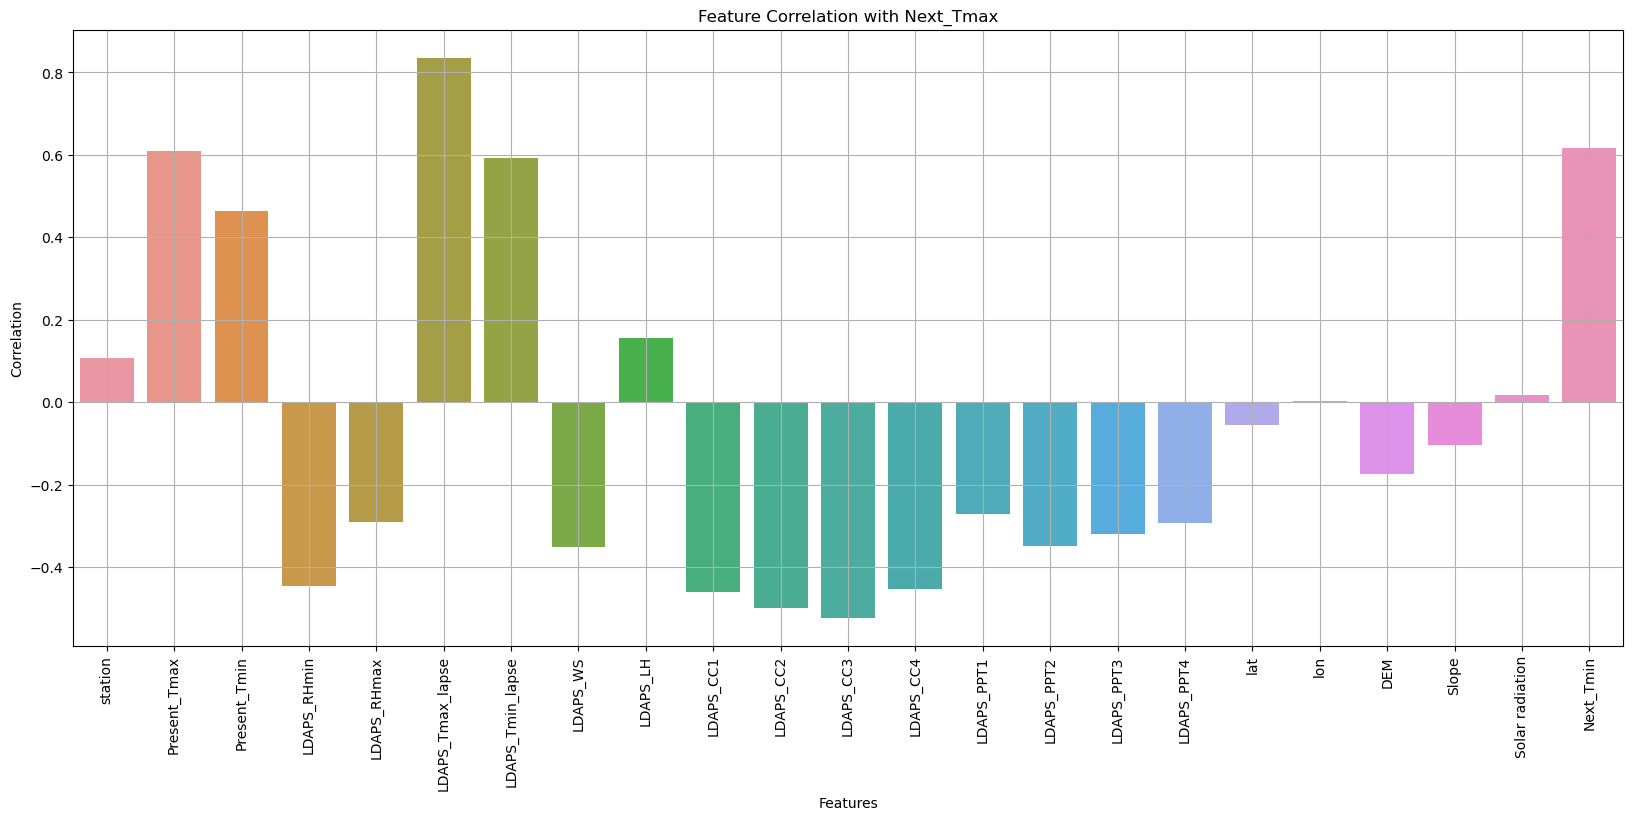

In [24]:
# Plot correlation with target variable
plt.figure(figsize=(20, 8))
sns.barplot(x=corr_matrix['Next_Tmax'].drop('Next_Tmax').index, y=corr_matrix['Next_Tmax'].drop('Next_Tmax').values)
plt.title("Feature Correlation with Next_Tmax")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

From the above graphs, we can observe that:

1. **Positive Correlation**:
   - The columns `Station`, `Present_Tmax`, `Present_Tmin`, `LDAPS_Tmax_lapse`, `LDAPS_Tmin_lapse`, `LDAPS_LH`, `Solar radiation`, `Lon`, and `Next_Tmin` have a positive correlation with the target variable (`Next_Tax`).
   - Among these, `LDAPS_Tmax_lapse` shows a high positive correlation.
   - `Present_Tmax`, `Present_Tmin`, and `Next_Tmin` have a moderate positive correlation with the target variable.

2. **Negative Correlation**:
   - The columns `LDAPS_RHmin`, `LDAPS_RHmax`, `LDAPS_ws`, `LDAPS_CC1`, `LDAPS_CC2`, `LDAPS_CC3`, `LDAPS_CC4`, `LDAPS_PPT1`, `LDAPS_PPT2`, `LDAPS_PPT3`, `LDAPS_PPT4`, `Lat`, `DEM`, and `Slope` have a negative correlation with the target variable.

3. **Correlation Strength**:
   - `LDAPS_Tmax_lapse` has the highest positive correlation with the target variable.
   - `Present_Tmax`, `Present_Tmin`, and `Next_Tmin` show moderate positive correlations.
   - Other columns with positive correlation exhibit a weaker positive relationship with the target variable.
4. Variables related to relative humidity, wind speed, cloud cover, precipitation, latitude, elevation, and slope show negative correlations with Next_Tmax, indicating they are inversely related to future minimum temperatures.

#### Splitting the data into training and test

In [25]:
#seperating independent variable and target into x and y
x=df.drop('Next_Tmax',axis=1)
y=df['Next_Tmax']
print('Dimension of independent',x.shape)
print('Dimension of Target',y.shape)

Dimension of independent (7588, 23)
Dimension of Target (7588,)


#### Feature Scaling using Standard Scalarization

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.664607     -0.353318     -0.748029     0.104660     0.382768   
1    -1.526052      0.725138     -0.664721    -0.305052     0.311697   
2    -1.387498      0.624033      0.043400    -0.549344    -0.609425   
3    -1.248943      0.758840      0.085054     0.103573     1.128335   
4    -1.110389      0.556630     -0.539758    -0.037665     0.249244   
...        ...           ...           ...          ...          ...   
7583  1.106481     -2.240616     -2.247578    -2.190405    -1.402898   
7584  1.245036     -2.442826     -2.414195    -1.820788    -0.648815   
7585  1.383590     -2.173212     -2.539157    -2.050081    -1.318376   
7586  1.522145     -2.173212     -2.289232    -2.234735    -1.537141   
7587  1.660699     -2.206914     -2.414195    -2.310467    -1.544257   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.525269         -0.215525 -0.126423  0.206603  -0.513123  ...   
1             0.078334          0.223368 -0.644133 -0.313359  -0.545304  ...   
2             0.160080          0.449896 -0.439100 -1.244497  -0.606944  ...   
3             0.028710         -0.079238 -0.663353  0.096026  -0.580143  ...   
4            -0.171981         -0.010803 -0.624327  1.349989  -0.827872  ...   
...                ...               ...       ...       ...        ...  ...   
7583         -0.614083         -2.223667 -0.225479 -1.569844  -1.203497  ...   
7584         -0.990460         -2.432415 -0.609132  0.583486  -1.151793  ...   
7585         -1.110333         -2.021883 -0.434188  0.283984  -1.290699  ...   
7586         -0.886737         -2.039881 -0.253241 -0.452772  -1.268430  ...   
7587         -0.570995         -2.129768  0.089654 -1.585402  -1.218554  ...   

      LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat       lon  \
0      -0.559482   -0.509339   -0.483908   -0.430019  1.186076 -0.005302   
1      -0.559482   -0.509339   -0.483908   -0.430019  1.186076  0.512280   
2      -0.559482   -0.509339   -0.483908   -0.430019  0.650626  0.840503   
3      -0.559482   -0.509339   -0.483908   -0.430019  1.987268  0.386040   
4      -0.559482   -0.509339   -0.483908   -0.430019  0.117159  1.812547   
...          ...         ...         ...         ...       ...       ...   
7583   -0.559482   -0.509339   -0.483908   -0.430019  0.117159  0.613271   
7584   -0.559482   -0.509339   -0.483908   -0.430019 -0.686016  1.193973   
7585   -0.559482   -0.509339   -0.483908   -0.430019 -0.150566 -1.267697   
7586   -0.559482   -0.509339   -0.483908   -0.430019 -0.418291 -1.040466   
7587   -0.559482   -0.509339   -0.483908   -0.430019 -0.418291 -0.270405   

           DEM     Slope  Solar radiation  Next_Tmin  
0     2.769091  1.111162         1.510565  -0.689265  
1    -0.315828 -0.543220         1.222997  -0.165513  
2    -0.526719 -0.723891         1.209602   0.398527  
3    -0.298272  0.928888         1.194265   0.559681  
4    -0.494848 -0.549485         1.200286  -0.165513  
...        ...       ...              ...        ...  
7583 -0.655747 -0.500966        -2.065599  -2.099366  
7584 -0.735482 -0.820711        -2.098689  -2.341098  
7585 -0.852919 -0.804538        -2.095175  -1.938212  
7586 -0.821476 -0.755800        -2.106671  -1.656192  
7587 -0.779341 -0.720103        -2.076487  -2.220232  

[7588 rows x 23 columns]

#### Checking Variance Inflation Factor(VIF)

In [27]:
#Checking Variance Inflation Factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

VIF Values          Features
0     1.231438           station
1     2.850684      Present_Tmax
2     3.486888      Present_Tmin
3     6.594886       LDAPS_RHmin
4     2.275409       LDAPS_RHmax
5     7.811168  LDAPS_Tmax_lapse
6     9.704234  LDAPS_Tmin_lapse
7     1.305934          LDAPS_WS
8     1.536222          LDAPS_LH
9     4.856502         LDAPS_CC1
10    5.980787         LDAPS_CC2
11    5.712894         LDAPS_CC3
12    3.401116         LDAPS_CC4
13    2.537586        LDAPS_PPT1
14    2.421756        LDAPS_PPT2
15    1.865652        LDAPS_PPT3
16    1.961150        LDAPS_PPT4
17    1.237327               lat
18    1.174088               lon
19    3.360967               DEM
20    3.106391             Slope
21    1.247083   Solar radiation
22    6.167156         Next_Tmin

In [28]:
x.drop('LDAPS_Tmin_lapse',axis=1,inplace=True)

In [29]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

VIF Values          Features
0     1.230058           station
1     2.672027      Present_Tmax
2     3.383026      Present_Tmin
3     5.358346       LDAPS_RHmin
4     2.261846       LDAPS_RHmax
5     5.121248  LDAPS_Tmax_lapse
6     1.302841          LDAPS_WS
7     1.452608          LDAPS_LH
8     4.765465         LDAPS_CC1
9     5.959841         LDAPS_CC2
10    5.712647         LDAPS_CC3
11    3.400534         LDAPS_CC4
12    2.516980        LDAPS_PPT1
13    2.419177        LDAPS_PPT2
14    1.854983        LDAPS_PPT3
15    1.960162        LDAPS_PPT4
16    1.231764               lat
17    1.173633               lon
18    3.164000               DEM
19    2.905380             Slope
20    1.242612   Solar radiation
21    4.823163         Next_Tmin

### Performing PCA(Principal Component Analysis (PCA))

In [30]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4) 
x=pca.fit_transform(x)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#find the best random State
max_accuracy=0
best_state=0
random_state=range(1,200)
for state in random_state:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>max_accuracy:
        max_accuracy=acc
        best_state=state
print("Maximum R2_Score is=>",max_accuracy,"On Random State=>",best_state)

Maximum R2_Score is=> 0.7452166093223782 On Random State=> 30


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=best_state)

#### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
LR=LinearRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)
accuracy_LR=r2_score(y_test,LR_pred)
print('R2 Score:-',accuracy_LR*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,LR_pred))
print('Mean Squared Error:-',mean_squared_error(y_test,LR_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,LR_pred)))

R2 Score:- 74.52166093223782
Mean Absolute Error:- 1.2348575211251043
Mean Squared Error:- 2.5406417107149015
Root Mean Squared Error: 1.5939390548935368


#### Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
RFR_pred=RFR.predict(x_test)
accuracy_RFR=r2_score(y_test,RFR_pred)
print('R2 Score',accuracy_RFR*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,RFR_pred))
print('Mean Squared Error:-',mean_squared_error(y_test,RFR_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,RFR_pred)))

R2 Score 78.26466791032122
Mean Absolute Error:- 1.1446249451032058
Mean Squared Error:- 2.1673976139657443
Root Mean Squared Error: 1.472208413902646


#### ExtraTrees Regressor

In [36]:
from sklearn.ensemble import ExtraTreesRegressor
ETC=ExtraTreesRegressor()
ETC.fit(x_train,y_train)
ETC_pred=ETC.predict(x_test)
accuracy_ETC=r2_score(y_test,ETC_pred)
print('R2 Score',accuracy_ETC*100)
print('Mean absolute Error',mean_absolute_error(y_test,ETC_pred))
print('Mean Squared Error',mean_squared_error(y_test,ETC_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,ETC_pred)))

R2 Score 78.21925561446696
Mean absolute Error 1.1394477382520865
Mean Squared Error 2.1719260242643843
Root Mean Squared Error: 1.4737455765037546


#### Lasso Regressor

In [37]:
from sklearn.linear_model import Lasso
LS=Lasso()
LS.fit(x_train,y_train)
pred_ls=LS.predict(x_test)
accuracy_ls=r2_score(y_test,pred_ls)
print('R2 Score:',accuracy_ls*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ls))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

R2 Score: 61.618663191263636
Mean Absolute Error: 1.5523318598805464
Mean Squared Error: 3.8272991402589716
Root Mean Squared Error: 1.9563484199546286


#### Redge Regressor

In [38]:
from sklearn.linear_model import Ridge
RG=Ridge()
RG.fit(x_train,y_train)
RG_pred=RG.predict(x_test)
accuracy_RG=r2_score(y_test,RG_pred)
print('R2 Score',accuracy_RG*100)
print('Mean Absolute Error',mean_absolute_error(y_test,RG_pred))
print('Mean Squared Error',mean_squared_error(y_test,RG_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,RG_pred)))

R2 Score 74.5214923000902
Mean Absolute Error 1.2348630053902845
Mean Squared Error 2.5406585263270527
Root Mean Squared Error: 1.5939443297452558


#### K-Neighbors Regressor

In [39]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
accuracy_knn=r2_score(y_test,pred_knn)
print('R2 Score:',accuracy_knn*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 Score: 78.04063085903366
Mean Absolute Error: 1.1456126482213438
Mean Squared Error: 2.189738076416337
Root Mean Squared Error: 1.4797763602708136


#### SVR

In [40]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
print('R2 Score:',r2_score(y_test,pred_svr)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 Score: 77.23308233451444
Mean Absolute Error: 1.153223909265108
Mean Squared Error: 2.2702649686663814
Root Mean Squared Error: 1.506739847706425


#### GradientBoostingRegressor

In [41]:
from sklearn.ensemble import GradientBoostingRegressor 
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
print('R2 Score:',r2_score(y_test,pred_GBR)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 Score: 76.45826509230518
Mean Absolute Error: 1.1916011234901216
Mean Squared Error: 2.34752797229085
Root Mean Squared Error: 1.5321644729893884


#### Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
score1=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,LR_pred)-score1.mean())*100)

[0.70625527 0.559533   0.63534416 0.82796246 0.65978692]
0.6777763626706264
Difference between R2 score and cross validation score is: 6.744024665175186


In [44]:
score2=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,RFR_pred)-score2.mean())*100)

[0.66643038 0.51160511 0.499294   0.75458399 0.60361595]
0.60710588448033
Difference between R2 score and cross validation score is: 17.55407946228823


In [45]:
score3=cross_val_score(ETC,x,y)
print(score3)
print(score3.mean())
print('Difference Between R2 score and cross validation score is:',(r2_score(y_test,ETC_pred)-score3.mean())*100)

[0.67059818 0.51624353 0.50210459 0.76253576 0.59948111]
0.6101926338002704
Difference Between R2 score and cross validation score is: 17.19999223443991


In [46]:
score4=cross_val_score(LS,x,y)
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation sccore is:',(r2_score(y_test,pred_ls)-score4.mean())*100)

[0.69505453 0.47170383 0.48026165 0.56241955 0.56616335]
0.5551205802337698
Difference between R2 score and cross validation sccore is: 6.106605167886658


In [47]:
score5=cross_val_score(RG,x,y)
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,RG_pred)-score5.mean())*100)

[0.70626304 0.55953421 0.63534178 0.82795177 0.65979578]
0.67777731714066
Difference between R2 score and cross validation score is: 6.7437605860241945


In [48]:
score6=cross_val_score(knn,x,y)
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,pred_knn)-score6.mean())*100)

[0.62812169 0.46503395 0.4740945  0.71007166 0.57210398]
0.5698851559638868
Difference between R2 score and cross validation score is: 21.05211526264498


In [49]:
score7=cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,pred_svr)-score7.mean())*100)

[0.69743125 0.53760278 0.59719764 0.7983104  0.64219804]
0.6545480230624883
Difference between R2 score and cross validation score is: 11.778280028265609


In [50]:
score8=cross_val_score(GBR,x,y)
print(score8)
print(score8.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,pred_GBR)-score8.mean())*100)

[0.71053939 0.54946357 0.57862406 0.80546321 0.64842597]
0.658503240372447
Difference between R2 score and cross validation score is: 10.607941055060477


#### Hyper Parameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV

In [94]:
# Define the hyperparameters and the grid of values to search
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'random_state':[20,42,100]
}

In [95]:
GSCV=GridSearchCV(RG,param_grid,cv=5)

In [96]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'fit_intercept': [True, False],
                         'random_state': [20, 42, 100],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [97]:
GSCV.best_params_

{'alpha': 10.0, 'fit_intercept': True, 'random_state': 42, 'solver': 'saga'}

In [100]:
best_model=Ridge(alpha=10.0,fit_intercept=True,solver='saga',random_state=100)
best_model.fit(x_train,y_train)
pred_r=best_model.predict(x_test)
acc=r2_score(y_test,pred_r)
print(acc*100)

74.51995639675197


#### My model give 74.51% accuracy

In [101]:
#importing joblib and saving model
import joblib
joblib.dump(best_model,"Temperature Forecast Project.pkl")

['Temperature Forecast Project.pkl']

In [102]:
#Now loading file and checcking prediction 
model=joblib.load("Temperature Forecast Project.pkl")

In [103]:
prediction=model.predict(x_test)
prediction

array([31.99324151, 30.14900986, 32.883326  , ..., 29.34102793,
       29.20842551, 33.30988309])

In [104]:
Original=np.array(y_test)
df=pd.DataFrame()
df['Original']=Original
df['prediction']=prediction
df.head()

Original  prediction
0      36.1   31.993242
1      30.5   30.149010
2      35.1   32.883326
3      37.0   35.293503
4      33.9   34.012728

Text(0, 0.5, 'Predication')

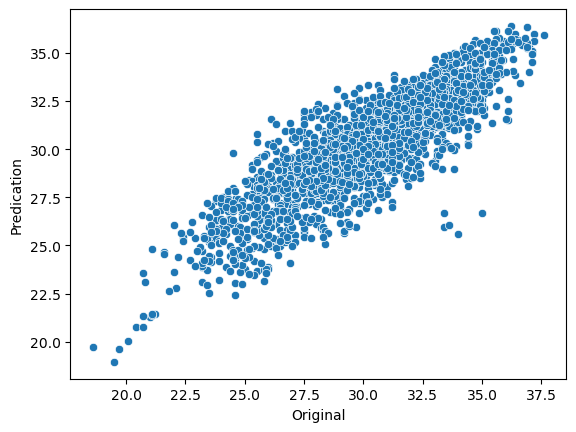

In [105]:
sns.scatterplot(x=Original,y=prediction)
plt.xlabel('Original')
plt.ylabel('Predication')

#### Now we will go with the target variable 'Next_Tmin'

#### Checking correlation between target variable and independent variables

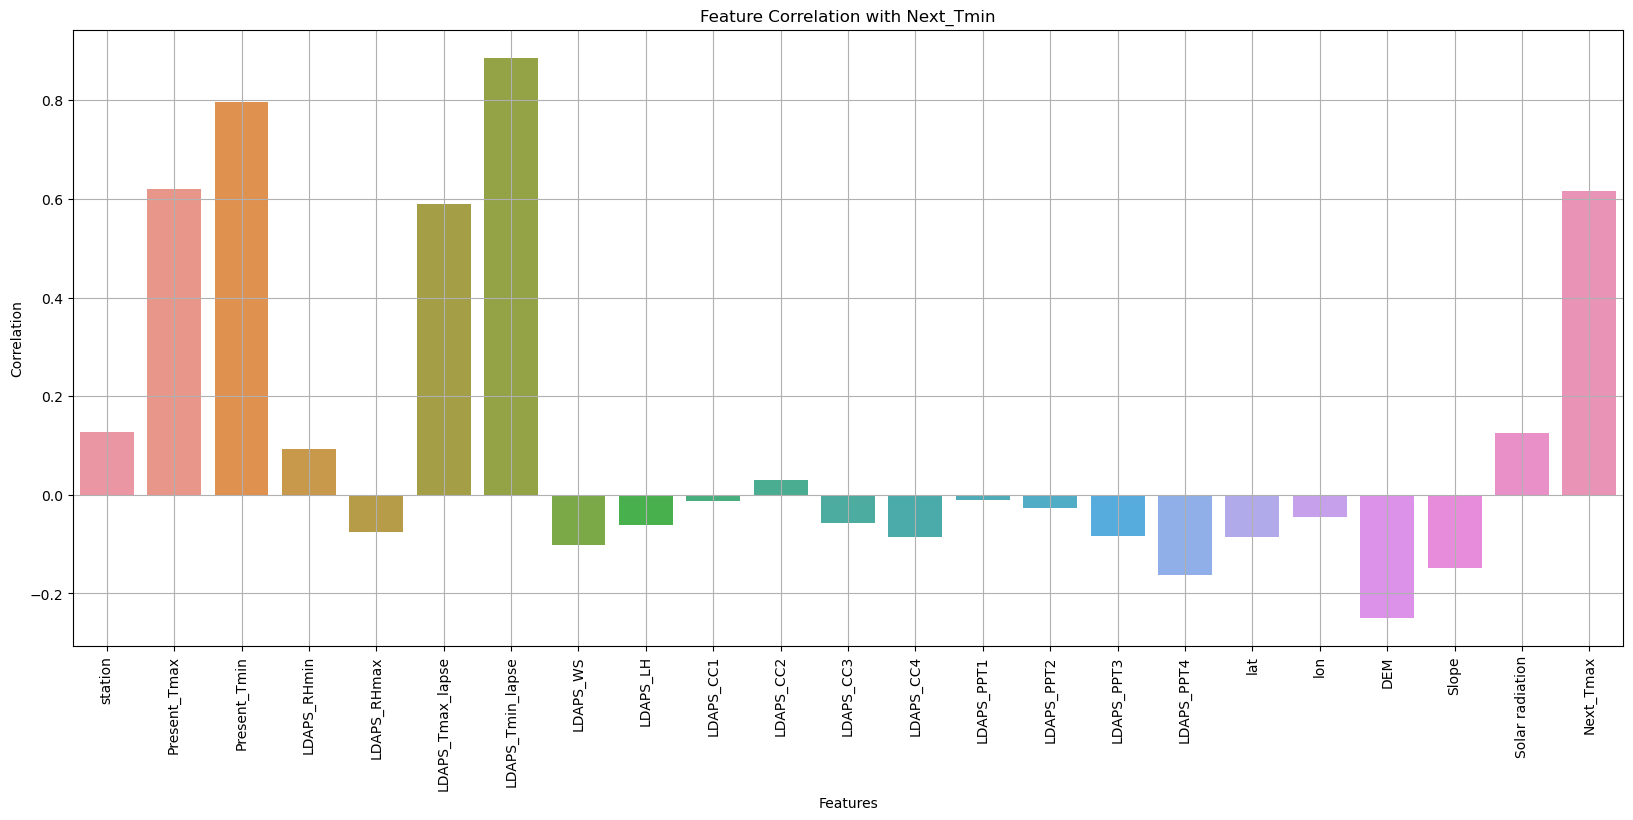

In [129]:
# Plot correlation with target variable
plt.figure(figsize=(20, 8))
sns.barplot(x=corr_matrix['Next_Tmin'].drop('Next_Tmin').index, y=corr_matrix['Next_Tmin'].drop('Next_Tmin').values)
plt.title("Feature Correlation with Next_Tmin")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

From the above graphs, we can observe that:

1. **Positive Correlation**:
   - The columns `Station`, `Present_Tmax`, `Present_Tmin`, `LDAPS_RHmin`, `LDAPS_Tmax_lapse`, `LDAPS_Tmin_lapse`, `LDAPS_CC2`, `Solar radiation`, and `Next_Tmax` have a positive correlation with the target variable (`Next_Tmin`).
   - Specifically, `Present_Tmin` and `LDAPS_Tmin_lapse` show a high positive correlation with the target variable.
   - `Present_Tmax`, `LDAPS_Tmax_lapse`, and `Next_Tmin` exhibit a moderate positive correlation with the target variable.
   - The remaining columns with positive correlation have a less significant positive relationship with the target variable.

2. **Negative Correlation**:
   - The columns `LDAPS_RHmax`, `LDAPS_LH`, `LDAPS_ws`, `LDAPS_CC1`, `LDAPS_CC3`, `LDAPS_CC4`, `LDAPS_PPT1`, `LDAPS_PPT2`, `LDAPS_PPT3`, `LDAPS_PPT4`, `Lat`, `DEM`, `Lon`, and `Slope` have a less negative correlation with the target variable (`Next_Tmin`).

These observations indicate which variables are positively or negatively associated with future minimum temperatures, helping in understanding the relationships and potential predictors for `Next_Tmin`.

#### Splitting the data into training and test

In [130]:
#seperating independent variable and target into x and y
x=df.drop('Next_Tmin',axis=1)
y=df['Next_Tmin']
print('Dimension of independent',x.shape)
print('Dimension of Target',y.shape)

Dimension of independent (7588, 23)
Dimension of Target (7588,)


#### Feature Scaling using Standard Scalarization

In [131]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.664607     -0.353318     -0.748029     0.104660     0.382768   
1    -1.526052      0.725138     -0.664721    -0.305052     0.311697   
2    -1.387498      0.624033      0.043400    -0.549344    -0.609425   
3    -1.248943      0.758840      0.085054     0.103573     1.128335   
4    -1.110389      0.556630     -0.539758    -0.037665     0.249244   
...        ...           ...           ...          ...          ...   
7583  1.106481     -2.240616     -2.247578    -2.190405    -1.402898   
7584  1.245036     -2.442826     -2.414195    -1.820788    -0.648815   
7585  1.383590     -2.173212     -2.539157    -2.050081    -1.318376   
7586  1.522145     -2.173212     -2.289232    -2.234735    -1.537141   
7587  1.660699     -2.206914     -2.414195    -2.310467    -1.544257   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.525269         -0.215525 -0.126423  0.206603  -0.513123  ...   
1             0.078334          0.223368 -0.644133 -0.313359  -0.545304  ...   
2             0.160080          0.449896 -0.439100 -1.244497  -0.606944  ...   
3             0.028710         -0.079238 -0.663353  0.096026  -0.580143  ...   
4            -0.171981         -0.010803 -0.624327  1.349989  -0.827872  ...   
...                ...               ...       ...       ...        ...  ...   
7583         -0.614083         -2.223667 -0.225479 -1.569844  -1.203497  ...   
7584         -0.990460         -2.432415 -0.609132  0.583486  -1.151793  ...   
7585         -1.110333         -2.021883 -0.434188  0.283984  -1.290699  ...   
7586         -0.886737         -2.039881 -0.253241 -0.452772  -1.268430  ...   
7587         -0.570995         -2.129768  0.089654 -1.585402  -1.218554  ...   

      LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat       lon  \
0      -0.559482   -0.509339   -0.483908   -0.430019  1.186076 -0.005302   
1      -0.559482   -0.509339   -0.483908   -0.430019  1.186076  0.512280   
2      -0.559482   -0.509339   -0.483908   -0.430019  0.650626  0.840503   
3      -0.559482   -0.509339   -0.483908   -0.430019  1.987268  0.386040   
4      -0.559482   -0.509339   -0.483908   -0.430019  0.117159  1.812547   
...          ...         ...         ...         ...       ...       ...   
7583   -0.559482   -0.509339   -0.483908   -0.430019  0.117159  0.613271   
7584   -0.559482   -0.509339   -0.483908   -0.430019 -0.686016  1.193973   
7585   -0.559482   -0.509339   -0.483908   -0.430019 -0.150566 -1.267697   
7586   -0.559482   -0.509339   -0.483908   -0.430019 -0.418291 -1.040466   
7587   -0.559482   -0.509339   -0.483908   -0.430019 -0.418291 -0.270405   

           DEM     Slope  Solar radiation  Next_Tmax  
0     2.769091  1.111162         1.510565  -0.366861  
1    -0.315828 -0.543220         1.222997   0.083068  
2    -0.526719 -0.723891         1.209602   0.275895  
3    -0.298272  0.928888         1.194265   0.468721  
4    -0.494848 -0.549485         1.200286   0.308032  
...        ...       ...              ...        ...  
7583 -0.655747 -0.500966        -2.065599  -0.848928  
7584 -0.735482 -0.820711        -2.098689  -0.720377  
7585 -0.852919 -0.804538        -2.095175  -0.623964  
7586 -0.821476 -0.755800        -2.106671  -0.527550  
7587 -0.779341 -0.720103        -2.076487  -0.784652  

[7588 rows x 23 columns]

#### Checking Variance Inflation Factor(VIF)

In [132]:
#Checking Variance Inflation Factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

VIF Values          Features
0     1.239172           station
1     2.936020      Present_Tmax
2     3.166892      Present_Tmin
3     6.582699       LDAPS_RHmin
4     2.274030       LDAPS_RHmax
5     9.366115  LDAPS_Tmax_lapse
6     7.612593  LDAPS_Tmin_lapse
7     1.349893          LDAPS_WS
8     1.564453          LDAPS_LH
9     4.890607         LDAPS_CC1
10    5.976963         LDAPS_CC2
11    5.723147         LDAPS_CC3
12    3.449730         LDAPS_CC4
13    2.529058        LDAPS_PPT1
14    2.414704        LDAPS_PPT2
15    1.866998        LDAPS_PPT3
16    1.948153        LDAPS_PPT4
17    1.236628               lat
18    1.180770               lon
19    3.210544               DEM
20    3.032603             Slope
21    1.247542   Solar radiation
22    4.522250         Next_Tmax

In [133]:
x.drop('LDAPS_Tmin_lapse',axis=1,inplace=True)

In [134]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

VIF Values          Features
0     1.237944           station
1     2.675759      Present_Tmax
2     2.729699      Present_Tmin
3     4.626190       LDAPS_RHmin
4     2.262244       LDAPS_RHmax
5     5.599687  LDAPS_Tmax_lapse
6     1.349800          LDAPS_WS
7     1.467492          LDAPS_LH
8     4.786787         LDAPS_CC1
9     5.920175         LDAPS_CC2
10    5.719963         LDAPS_CC3
11    3.449553         LDAPS_CC4
12    2.484341        LDAPS_PPT1
13    2.396903        LDAPS_PPT2
14    1.857626        LDAPS_PPT3
15    1.937477        LDAPS_PPT4
16    1.225969               lat
17    1.178929               lon
18    3.126642               DEM
19    2.912090             Slope
20    1.241633   Solar radiation
21    4.508480         Next_Tmax

#### Performing PCA(Principal Component Analysis (PCA))

In [135]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4) 
x=pca.fit_transform(x)

#### Linear Regression

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
LR=LinearRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)
accuracy_LR=r2_score(y_test,LR_pred)
print('R2 Score:-',accuracy_LR*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,LR_pred))
print('Mean Squared Error:-',mean_squared_error(y_test,LR_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,LR_pred)))

R2 Score:- 74.52166093223782
Mean Absolute Error:- 1.2348575211251043
Mean Squared Error:- 2.5406417107149015
Root Mean Squared Error: 1.5939390548935368


#### Random Forest Regressor

In [137]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
RFR_pred=RFR.predict(x_test)
accuracy_RFR=r2_score(y_test,RFR_pred)
print('R2 Score',accuracy_RFR*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,RFR_pred))
print('Mean Squared Error:-',mean_squared_error(y_test,RFR_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,RFR_pred)))

R2 Score 78.21390093920357
Mean Absolute Error:- 1.14955248133509
Mean Squared Error:- 2.1724599802371545
Root Mean Squared Error: 1.4739267214611296


#### ExtraTrees Regressor

In [138]:
from sklearn.ensemble import ExtraTreesRegressor
ETC=ExtraTreesRegressor()
ETC.fit(x_train,y_train)
ETC_pred=ETC.predict(x_test)
accuracy_ETC=r2_score(y_test,ETC_pred)
print('R2 Score',accuracy_ETC*100)
print('Mean absolute Error',mean_absolute_error(y_test,ETC_pred))
print('Mean Squared Error',mean_squared_error(y_test,ETC_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,ETC_pred)))

R2 Score 78.40596737278545
Mean absolute Error 1.1349213877909536
Mean Squared Error 2.153307554677208
Root Mean Squared Error: 1.4674152632016637


#### Lasso Regressor

In [139]:
from sklearn.linear_model import Lasso
LS=Lasso()
LS.fit(x_train,y_train)
pred_ls=LS.predict(x_test)
accuracy_ls=r2_score(y_test,pred_ls)
print('R2 Score:',accuracy_ls*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ls))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

R2 Score: 61.618663191263636
Mean Absolute Error: 1.5523318598805464
Mean Squared Error: 3.8272991402589716
Root Mean Squared Error: 1.9563484199546286


#### Redge Regressor

In [140]:
from sklearn.linear_model import Ridge
RG=Ridge()
RG.fit(x_train,y_train)
RG_pred=RG.predict(x_test)
accuracy_RG=r2_score(y_test,RG_pred)
print('R2 Score',accuracy_RG*100)
print('Mean Absolute Error',mean_absolute_error(y_test,RG_pred))
print('Mean Squared Error',mean_squared_error(y_test,RG_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,RG_pred)))

R2 Score 74.5214923000902
Mean Absolute Error 1.2348630053902845
Mean Squared Error 2.5406585263270527
Root Mean Squared Error: 1.5939443297452558


#### K-Neighbors Regressor

In [141]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
accuracy_knn=r2_score(y_test,pred_knn)
print('R2 Score:',accuracy_knn*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 Score: 78.04063085903366
Mean Absolute Error: 1.1456126482213438
Mean Squared Error: 2.189738076416337
Root Mean Squared Error: 1.4797763602708136


#### SVR

In [142]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
print('R2 Score:',r2_score(y_test,pred_svr)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 Score: 77.23308233451444
Mean Absolute Error: 1.153223909265108
Mean Squared Error: 2.2702649686663814
Root Mean Squared Error: 1.506739847706425


#### GradientBoostingRegressor

In [143]:
from sklearn.ensemble import GradientBoostingRegressor 
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
print('R2 Score:',r2_score(y_test,pred_GBR)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 Score: 76.45473364456825
Mean Absolute Error: 1.1917745672913491
Mean Squared Error: 2.347880120183842
Root Mean Squared Error: 1.532279387117063


#### Cross Validation

In [144]:
from sklearn.model_selection import cross_val_score

In [145]:
score1=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,LR_pred)-score1.mean())*100)

[0.33775747 0.44203608 0.58113161 0.78723571 0.75882382]
0.5813969391064109
Difference between R2 score and cross validation score is: 16.381967021596733


In [146]:
score2=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,RFR_pred)-score2.mean())*100)

[0.34430876 0.41557635 0.64624163 0.75224008 0.78323829]
0.5883210216223905
Difference between R2 score and cross validation score is: 19.38179877696452


In [147]:
score3=cross_val_score(ETC,x,y)
print(score3)
print(score3.mean())
print('Difference Between R2 score and cross validation score is:',(r2_score(y_test,ETC_pred)-score3.mean())*100)

[0.3411874  0.40772752 0.65361629 0.7548239  0.78683114]
0.5888372478748131
Difference Between R2 score and cross validation score is: 19.52224258530415


In [148]:
score4=cross_val_score(LS,x,y)
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation sccore is:',(r2_score(y_test,pred_ls)-score4.mean())*100)

[0.2346248  0.2931515  0.39842627 0.39410946 0.48364419]
0.3607912429444628
Difference between R2 score and cross validation sccore is: 25.539538896817355


In [149]:
score5=cross_val_score(RG,x,y)
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,RG_pred)-score5.mean())*100)

[0.33776217 0.44204566 0.5811277  0.78722378 0.75882153]
0.5813961656430962
Difference between R2 score and cross validation score is: 16.381875735780582


In [150]:
score6=cross_val_score(knn,x,y)
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,pred_knn)-score6.mean())*100)

[0.24636069 0.32013591 0.62750092 0.71963109 0.74208415]
0.5311425535957999
Difference between R2 score and cross validation score is: 24.92637549945367


In [151]:
score7=cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,pred_svr)-score7.mean())*100)

[0.38908703 0.39770426 0.67128114 0.74910237 0.78946373]
0.599327707604754
Difference between R2 score and cross validation score is: 17.30031157403904


#### Hyper Parameter Tuning

In [152]:
from sklearn.model_selection import GridSearchCV

In [153]:
# Define the hyperparameters and the grid of values to search
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'random_state':[20,42,100]
}

In [154]:
GSCV=GridSearchCV(RG,param_grid,cv=5)

In [155]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'fit_intercept': [True, False],
                         'random_state': [20, 42, 100],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [156]:
GSCV.best_params_

{'alpha': 10.0, 'fit_intercept': True, 'random_state': 42, 'solver': 'saga'}

In [161]:
best_model=Ridge(alpha=1.0,fit_intercept=True,solver='sag',random_state=42)
best_model.fit(x_train,y_train)
pred_r=best_model.predict(x_test)
acc=r2_score(y_test,pred_r)
print(acc*100)

74.52138397189351


#### My model give 74.52% accuracy

In [163]:
#importing joblib and saving model
import joblib
joblib.dump(best_model,"Temperature Forecast Project2.pkl")

['Temperature Forecast Project2.pkl']

In [164]:
#Now loading file and checcking prediction 
model=joblib.load("Temperature Forecast Project2.pkl")

In [165]:
prediction=model.predict(x_test)
prediction

array([31.99499251, 30.1482962 , 32.88457705, ..., 29.34078575,
       29.20771912, 33.3115051 ])

In [166]:
Original=np.array(y_test)
df=pd.DataFrame()
df['Original']=Original
df['prediction']=prediction
df.head()

Original  prediction
0      36.1   31.994993
1      30.5   30.148296
2      35.1   32.884577
3      37.0   35.295615
4      33.9   34.014443

Text(0, 0.5, 'Predication')

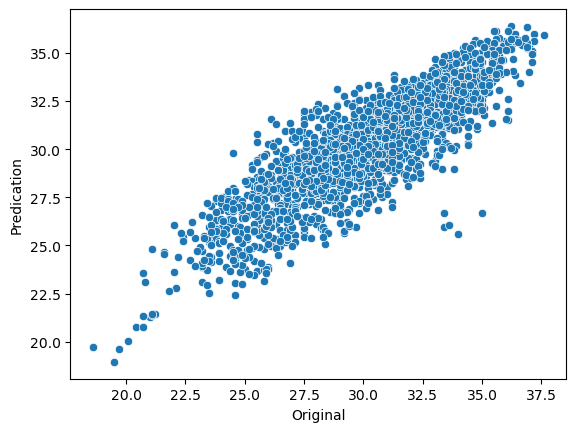

In [167]:
sns.scatterplot(x=Original,y=prediction)
plt.xlabel('Original')
plt.ylabel('Predication')